# Regression - Part 1 - Problem 2

# Load the data

In [16]:
import numpy as np
import pandas as pd

X_train = np.load('Xtrain_Regression_Part2.npy')
Y_train = np.load('Ytrain_Regression_Part2.npy')

X_test = np.load('Xtest_Regression_Part2.npy')

np.random.seed(10)

#df = pd.DataFrame(X_train)
#df.describe()

# Plot the boxplots to visualize the univariate outliers

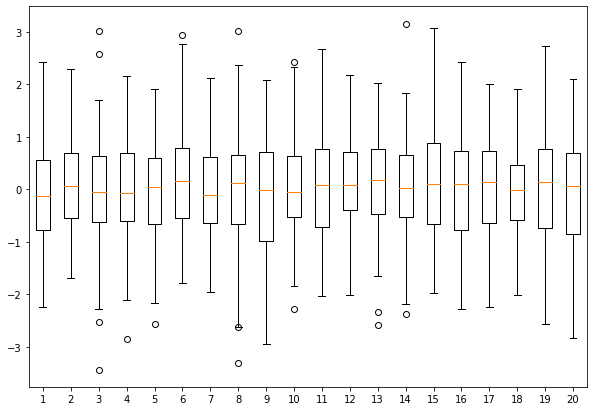

In [17]:
import matplotlib.pyplot as plt
import numpy as np
 
 
# Creating dataset
data = X_train
 
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(data)
 
# show plot
plt.show()

# Standardize features by removing the mean and scaling to unit variance.

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

x_train_scaled = scaler.transform(X_train)

#df1 = pd.DataFrame(x_train_scaled)
#df1.describe()

# Define cross-validation method

In [19]:
from sklearn.linear_model import LinearRegression ,Ridge ,Lasso, HuberRegressor, RANSACRegressor, TheilSenRegressor
from sklearn.model_selection import RepeatedKFold, cross_val_score

Linear = LinearRegression()
Ridge=Ridge()
Lasso=Lasso()
Huber = HuberRegressor()
Ransac=RANSACRegressor()
Theil=TheilSenRegressor()

estimators = [Linear, Ridge, Lasso, Huber, Ransac, Theil]

# evaluate a model
def evaluate_model(X, y, model):
	# define model evaluation method
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
	# force scores to be positive
	return absolute(scores)



In [20]:
from numpy import mean, std, absolute

for model in estimators:
    print('Model: ', model)
    results = evaluate_model(x_train_scaled, Y_train.ravel(), model)
    print('Mean MSE (std): %.7f (%.7f)' % (mean(results), std(results)))

Model:  LinearRegression()
Mean MSE (std): 2.0650802 (3.8182864)
Model:  Ridge()
Mean MSE (std): 2.0503110 (3.7907340)
Model:  Lasso()
Mean MSE (std): 7.9623503 (3.8785808)
Model:  HuberRegressor()
Mean MSE (std): 1.6705122 (4.1007245)
Model:  RANSACRegressor()
Mean MSE (std): 1.6604501 (4.0759239)
Model:  TheilSenRegressor(max_subpopulation=10000)
Mean MSE (std): 1.6550310 (4.0583651)


# Best model: TheilSenRegressor

# Test outliers removal

In [27]:
# evaluate model performance with outliers removed using isolation forest
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import IsolationForest
from sklearn.metrics import mean_absolute_error, mean_squared_error

X = x_train_scaled
y = Y_train

# split into train and test sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize the shape of the training dataset
print(X_train1.shape, y_train1.shape)
# identify outliers in the training dataset
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X_train1)
# select all rows that are not outliers
mask = yhat != -1
X_train1, y_train1 = X_train1[mask, :], y_train1[mask]
# summarize the shape of the updated training dataset
print(X_train1.shape, y_train1.shape)
# fit the model
model = LinearRegression()
model.fit(X_train1, y_train1)
# evaluate the model
yhat = model.predict(X_test1)
# evaluate predictions
MSE = mean_squared_error(y_test1, yhat)
mae = mean_absolute_error(y_test1, yhat)
print('MSE: %.3f' % MSE)

(67, 20) (67, 1)
(60, 20) (60, 1)
MSE: 1.986


# Remove outliers and test the models again

In [22]:
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(x_train_scaled)
# select all rows that are not outliers
mask = yhat != -1
X_train2, y_train2 = x_train_scaled[mask, :], Y_train[mask]
# summarize the shape of the updated training dataset
print(X_train2.shape, y_train2.shape)

(90, 20) (90, 1)


In [23]:
from sklearn.linear_model import LinearRegression ,Ridge ,Lasso, HuberRegressor, RANSACRegressor, TheilSenRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RepeatedKFold, cross_val_score

Linear = LinearRegression()
Ridge=Ridge()
Lasso=Lasso()
Huber = HuberRegressor()
Ransac=RANSACRegressor()
Theil=TheilSenRegressor()
#Xgboost=XGBRegressor()

estimators = [Linear, Ridge, Lasso, Huber, Ransac, Theil]

# evaluate a model
def evaluate_model(X, y, model):
	# define model evaluation method
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
	# force scores to be positive
	return absolute(scores)


In [24]:
from numpy import mean, std

for model in estimators:
    print('Model: ', model)
    results = evaluate_model(X_train2, y_train2.ravel(), model)
    print('Mean MSE (std): %.7f (%.7f)' % (mean(results), std(results)))

Model:  LinearRegression()
Mean MSE (std): 2.3179700 (3.5575906)
Model:  Ridge()
Mean MSE (std): 2.2862087 (3.5155624)
Model:  Lasso()
Mean MSE (std): 8.0698992 (3.9651519)
Model:  HuberRegressor()
Mean MSE (std): 1.8456534 (3.9675045)
Model:  RANSACRegressor()
Mean MSE (std): 1.8322260 (3.9396657)
Model:  TheilSenRegressor(max_subpopulation=10000)
Mean MSE (std): 1.8257507 (3.9181467)


# No improvement with outlier removal

# Fit the best model and generate Output data

In [25]:
from sklearn.linear_model import TheilSenRegressor

from sklearn.model_selection import RepeatedKFold, cross_val_score
from numpy import absolute

Theil_final=TheilSenRegressor()
Theil_final.fit(x_train_scaled, Y_train.ravel())

print('TheilSen Coef.:', Theil_final.coef_)
print('TheilSen Intercept:', Theil_final.intercept_)


TheilSen Coef.: [ 0.90725582 -0.2291166  -0.56232028  0.02206816 -1.33660792 -0.7066966
  0.01233491  0.00559739  1.10147696 -0.01744198 -0.01925198  1.26562156
 -0.0046194   0.09897829  0.26881346  0.4123526   0.58884372 -0.16520533
  0.85098285  0.44682573]
TheilSen Intercept: 0.007560664915546527


# Output

In [26]:
from numpy import save

y_test = Theil_final.predict(X_test)
np.save('Ytest_Regression_Part2.npy', y_test)